In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

In [153]:
df = pd.read_csv('CleanedData.csv', index_col = 0)

In [154]:
df.head(10)

,id,title,original_language,overview,genres,popularity,release_date,vote_average,vote_count,year,belongs_to_collection,budget,production_companies,production_countries,revenue,runtime,score
0,76600,Avatar: The Way of Water,en,Set more than a decade after the events of the...,"['Science Fiction', 'Adventure', 'Action']",329.467,2022-12-14,7.655,9839,2022,Avatar Collection,18000000.0,"['Twentieth Century Fox Film Corporation', 'Li...",['United States of America'],4.288672e+07,108.0,7.62
1,9552,The Exorcist,en,12-year-old Regan MacNeil begins to adapt an e...,['Horror'],114.989,1973-12-26,7.721,7254,1973,The Exorcist Collection,8000000.0,"['Warner Bros.', 'Hoya Productions']",['United States of America'],4.413061e+08,122.0,7.67
2,157336,Interstellar,en,The adventures of a group of explorers who mak...,"['Adventure', 'Drama', 'Science Fiction']",132.297,2014-11-05,8.418,32591,2014,NaN,165000000.0,"['Paramount Pictures', 'Legendary Pictures', '...","['Canada', 'United States of America', 'United...",6.751200e+08,169.0,8.40
3,176,Saw,en,Obsessed with teaching his victims the value o...,"['Horror', 'Mystery', 'Crime']",382.841,2004-10-01,7.400,8344,2004,Saw Collection,1200000.0,"['Lions Gate Films', 'Twisted Pictures', 'Evol...",['United States of America'],1.039117e+08,103.0,7.37
4,671,Harry Potter and the Philosopher's Stone,en,Harry Potter has lived under the stairs at his...,"['Adventure', 'Fantasy']",199.505,2001-11-16,7.916,25390,2001,Harry Potter Collection,125000000.0,"['1492 Pictures', 'Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",9.764756e+08,152.0,7.90
5,155,The Dark Knight,en,Batman raises the stakes in his war on crime. ...,"['Drama', 'Action', 'Crime', 'Thriller']",110.984,2008-07-16,8.511,30639,2008,The Dark Knight Collection,185000000.0,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['United Kingdom', 'United States of America']",1.004558e+09,152.0,8.49
6,11,Star Wars,en,Princess Leia is captured and held hostage by ...,"['Adventure', 'Action', 'Science Fiction']",91.676,1977-05-25,8.204,19164,1977,Star Wars Collection,11000000.0,"['Lucasfilm', 'Twentieth Century Fox Film Corp...",['United States of America'],7.753980e+08,121.0,8.17
7,19995,Avatar,en,"In the 22nd century, a paraplegic Marine is di...","['Action', 'Adventure', 'Fantasy', 'Science Fi...",104.417,2009-12-15,7.573,29824,2009,Avatar Collection,237000000.0,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2.787965e+09,162.0,7.56
8,603,The Matrix,en,"Set in the 22nd century, The Matrix tells the ...","['Action', 'Science Fiction']",76.635,1999-03-30,8.206,23833,1999,The Matrix Collection,63000000.0,"['Village Roadshow Pictures', 'Groucho II Film...","['Australia', 'United States of America']",4.635174e+08,136.0,8.18
9,948,Halloween,en,Fifteen years after murdering his sister on Ha...,"['Horror', 'Thriller']",75.657,1978-10-24,7.561,4988,1978,Halloween Collection,300000.0,"['Compass International Pictures', 'Falcon Int...",['United States of America'],7.000000e+07,91.0,7.50


In [155]:
df_num = df[['popularity', 'budget', 'revenue', 'runtime', 'score']]

In [156]:
df_num.head(10)

,popularity,budget,revenue,runtime,score
0,329.467,18000000.0,4.288672e+07,108.0,7.62
1,114.989,8000000.0,4.413061e+08,122.0,7.67
2,132.297,165000000.0,6.751200e+08,169.0,8.40
3,382.841,1200000.0,1.039117e+08,103.0,7.37
4,199.505,125000000.0,9.764756e+08,152.0,7.90
5,110.984,185000000.0,1.004558e+09,152.0,8.49
6,91.676,11000000.0,7.753980e+08,121.0,8.17
7,104.417,237000000.0,2.787965e+09,162.0,7.56
8,76.635,63000000.0,4.635174e+08,136.0,8.18
9,75.657,300000.0,7.000000e+07,91.0,7.50


In [157]:
def normalize(df, columns_to_normalize):
    df_normalized = df.copy()

    for column in columns_to_normalize:
        min_value = df[column].min()
        max_value = df[column].max()

        df_normalized[column] = (10 * (df[column] - min_value) / (max_value - min_value)).round(2)

    return df_normalized

In [158]:
columns_to_normalize = ['popularity', 'budget', 'revenue', 'runtime']

In [159]:
df_normalized = df_num.copy()
df_normalized = normalize(df_normalized, columns_to_normalize)

In [160]:
df_normalized.head(10)

,popularity,budget,revenue,runtime,score
0,8.60,0.47,0.15,3.34,7.62
1,2.99,0.21,1.58,3.79,7.67
2,3.45,4.34,2.42,5.29,8.40
3,10.00,0.03,0.37,3.18,7.37
4,5.20,3.29,3.50,4.75,7.90
5,2.89,4.87,3.60,4.75,8.49
6,2.38,0.29,2.78,3.76,8.17
7,2.72,6.24,10.00,5.06,7.56
8,1.99,1.66,1.66,4.24,8.18
9,1.96,0.01,0.25,2.80,7.50


In [161]:
#Function to create and add Labels in the data:

def add_labels(df):
    df['label'] = df['score'].apply(lambda score: 'Below Average' if score < 6.3 else ('Average' if 6.3 <= score <= 7.3 else 'Above Average'))
    return df

In [162]:
labeled_df = add_labels(df_normalized)

In [163]:
labeled_df.head(10)

,popularity,budget,revenue,runtime,score,label
0,8.60,0.47,0.15,3.34,7.62,Above Average
1,2.99,0.21,1.58,3.79,7.67,Above Average
2,3.45,4.34,2.42,5.29,8.40,Above Average
3,10.00,0.03,0.37,3.18,7.37,Above Average
4,5.20,3.29,3.50,4.75,7.90,Above Average
5,2.89,4.87,3.60,4.75,8.49,Above Average
6,2.38,0.29,2.78,3.76,8.17,Above Average
7,2.72,6.24,10.00,5.06,7.56,Above Average
8,1.99,1.66,1.66,4.24,8.18,Above Average
9,1.96,0.01,0.25,2.80,7.50,Above Average


<AxesSubplot:title={'center':'Count (label)'}>

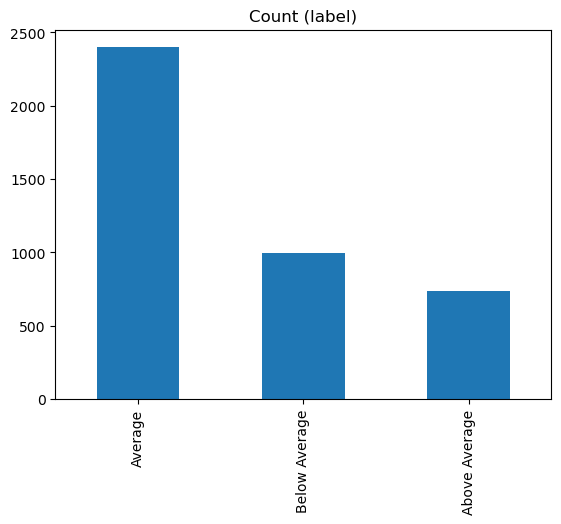

In [164]:
labeled_df.label.value_counts().plot(kind='bar', title='Count (label)')

In [165]:
sampled_df = labeled_df.sample(n=4127, random_state=42)

In [166]:
X = sampled_df.drop(['label', 'score'], axis = 1)
y = sampled_df['label']

In [167]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [168]:
# Convert target variable to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [170]:
#Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Use softmax for multi-class classification

In [171]:
# Compile the model with sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
180/180 [==============================] - 3s 6ms/step - loss: 1.2715 - accuracy: 0.4791 - val_loss: 0.9546 - val_accuracy: 0.4917
Epoch 2/20
180/180 [==============================] - 1s 4ms/step - loss: 1.0787 - accuracy: 0.5076 - val_loss: 0.9124 - val_accuracy: 0.5444
Epoch 3/20
180/180 [==============================] - 1s 4ms/step - loss: 1.0161 - accuracy: 0.5140 - val_loss: 0.8948 - val_accuracy: 0.5625
Epoch 4/20
180/180 [==============================] - 1s 4ms/step - loss: 0.9721 - accuracy: 0.5319 - val_loss: 0.8834 - val_accuracy: 0.5556
Epoch 5/20
180/180 [==============================] - 1s 4ms/step - loss: 0.9450 - accuracy: 0.5383 - val_loss: 0.8787 - val_accuracy: 0.5694
Epoch 6/20
180/180 [==============================] - 1s 6ms/step - loss: 0.9222 - accuracy: 0.5468 - val_loss: 0.8802 - val_accuracy: 0.5757
Epoch 7/20
180/180 [==============================] - 1s 5ms/step - loss: 0.9210 - accuracy: 0.5548 - val_loss: 0.8829 - val_accuracy: 0.5688
Epoch 

In [173]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

45/45 [==============================] - 0s 3ms/step - loss: 0.8597 - accuracy: 0.5896
Test Loss: 0.8597061038017273, Test Accuracy: 0.5895833373069763


In [174]:
import numpy as np
# Print classification report
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred))

45/45 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       478
           1       0.48      0.36      0.41       474
           2       0.57      0.74      0.64       488

    accuracy                           0.59      1440
   macro avg       0.58      0.59      0.58      1440
weighted avg       0.58      0.59      0.58      1440



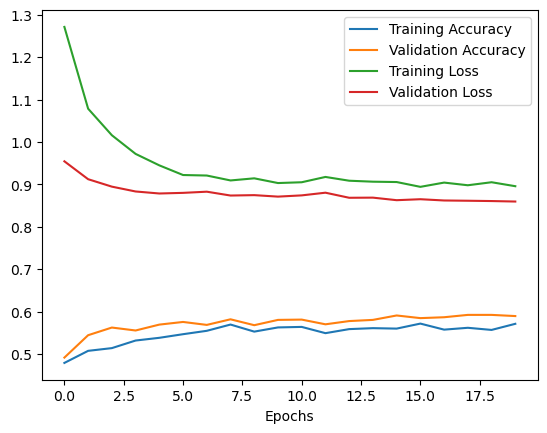

In [175]:
# Plot the accuracy and loss for the training and validation sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [176]:
#Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))  # Use softmax for multi-class classification

In [177]:
# Compile the model with sparse categorical crossentropy
model.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [178]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
90/90 [==============================] - 3s 8ms/step - loss: 0.9924 - accuracy: 0.5383 - val_loss: 1.0998 - val_accuracy: 0.3431
Epoch 2/50
90/90 [==============================] - 0s 4ms/step - loss: 0.8879 - accuracy: 0.5725 - val_loss: 1.0486 - val_accuracy: 0.4694
Epoch 3/50
90/90 [==============================] - 0s 4ms/step - loss: 0.8718 - accuracy: 0.5861 - val_loss: 0.9769 - val_accuracy: 0.5160
Epoch 4/50
90/90 [==============================] - 0s 4ms/step - loss: 0.8542 - accuracy: 0.5864 - val_loss: 0.9036 - val_accuracy: 0.5597
Epoch 5/50
90/90 [==============================] - 0s 4ms/step - loss: 0.8539 - accuracy: 0.5906 - val_loss: 0.8775 - val_accuracy: 0.5792
Epoch 6/50
90/90 [==============================] - 0s 4ms/step - loss: 0.8549 - accuracy: 0.5835 - val_loss: 0.8539 - val_accuracy: 0.5799
Epoch 7/50
90/90 [==============================] - 0s 5ms/step - loss: 0.8457 - accuracy: 0.5901 - val_loss: 0.8497 - val_accuracy: 0.5868
Epoch 8/50
90/90 [==

In [179]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

45/45 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.6049
Test Loss: 0.8229458928108215, Test Accuracy: 0.6048611402511597


In [180]:
import numpy as np
# Print classification report
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred))

45/45 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       478
           1       0.52      0.33      0.40       474
           2       0.61      0.76      0.68       488

    accuracy                           0.60      1440
   macro avg       0.59      0.60      0.59      1440
weighted avg       0.59      0.60      0.59      1440



In [181]:
from sklearn.metrics import confusion_matrix
NN_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(NN_matrix)


The confusion matrix is:
[[345  82  51]
 [136 157 181]
 [ 55  64 369]]


<Figure size 1800x1500 with 0 Axes>

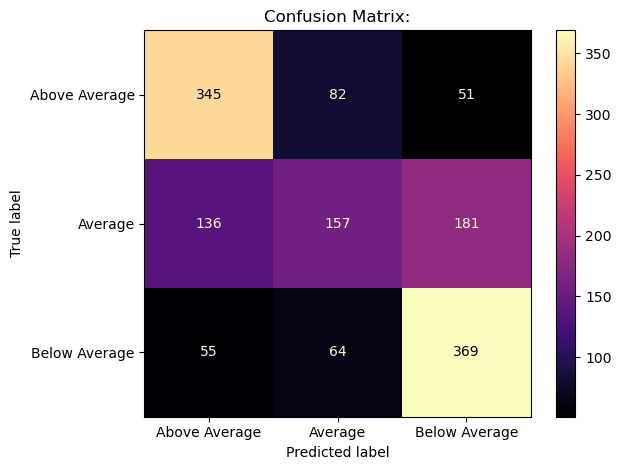

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=NN_matrix, display_labels=['Above Average', 'Average', 'Below Average'])
plt.figure(figsize=(18, 15))
disp.plot(cmap='magma')
plt.title("Confusion Matrix:")
plt.tight_layout()
plt.show()

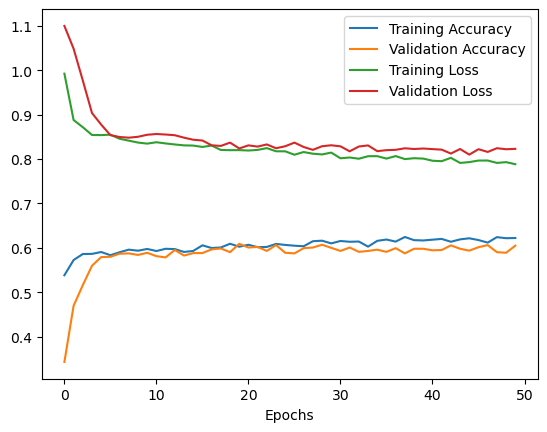

In [183]:
# Plot the accuracy and loss for the training and validation sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()